In [3]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt 



from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )
print( 'Keras Version: ', tf.keras.__version__ ) 


Python Version:  3.7.12
TensorFlow Version:  2.4.0
Keras Version:  2.4.0


In [4]:
import os
RawDataPath = 'D:/characters/'
TraningDataPath = 'D:/characters/'
TestingDataPath = 'D:/test/'

#os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() ) 

Current working directory: D:\19CTT2\Year3\sem2_Y3\NLP\NOM-OCR


In [3]:
# def Loading_Image( image_path ):
#     img = load_img( image_path )  
#     img = tf.constant( np.array(img) )  
#     return img

# def Show( image, title=None ) :
#     if len( image.shape )>3 :
#         image = tf.squeeze( image, axis=0 )   

#     plt.imshow( image )
#     if title:
#         plt.title( title )
        

# img_list = []
# for c in SelectedWords : 
#     folder_path = TraningDataPath+'/'+c
#     file_names = os.listdir( folder_path )
#     for i in range(5) :
#         img_list.append( folder_path+'/'+file_names[i] )

# plt.gcf().set_size_inches( (12,12) ) 
# # for i in range(20):      
# #     plt.subplot(4,5,i+1)
# #     title = img_list[i].split('/')[-1].split('_')[-2]
# #     img = Loading_Image( img_list[i] )
# #     Show( img, title )

NameError: name 'SelectedWords' is not defined

In [5]:
import os

folder = 'D:/characters'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]
print((sub_folders[10]))
Num_Classes = len(sub_folders)
Image_Size = ( 40, 40 )
Epochs = 50
Batch_Size = 64

2013B


In [25]:
%run -i Preprocess.py characters

In [7]:
Train_Data_Genetor = ImageDataGenerator( rescale = 1./255, validation_split = 0.2,
                                         width_shift_range = [-3,3],   
                                         height_shift_range =[-3,3],
                                         zoom_range = 0.1,  
                                         brightness_range=[0.4,1.5],
                                         horizontal_flip = False
                                       )

In [8]:
Train_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                          target_size = Image_Size,
                                                          batch_size = Batch_Size,
                                                          class_mode = 'categorical',
                                                          color_mode="grayscale",
                                                          shuffle = True, 
                                                          subset = 'training' )

Found 16028 images belonging to 2637 classes.


In [ ]:
# def Plot_Genetor( imgs, labels=[], grid=(1,10), size=(20,2) ):
#     n = len( imgs )             
#     plt.gcf().set_size_inches(size) 
#     for i in range(n):           
#         ax = plt.subplot( grid[0], grid[1], i+1 )   
#         ax.imshow( imgs[i] )            
#         if len(labels):
#             ax.set_title( f'Label={labels[i]}' )   
#         ax.set_xticks([]); ax.set_yticks([]) 
#     plt.show()  

# batch = 1
# for data, label in Train_Generator:
#     print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
#     Plot_Genetor( data, label )
#     batch += 1
#     if batch > len(Train_Generator): 
#         break

# print( f'There are {len(Train_Generator)} batches.' )

In [9]:
Val_Data_Genetor = ImageDataGenerator( rescale=1./255, validation_split = 0.2 )

In [10]:
Val_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                        target_size = Image_Size,
                                                        batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        color_mode="grayscale",
                                                        shuffle = True, 
                                                        subset = 'validation' )

Found 2905 images belonging to 2637 classes.


In [10]:
# CNN = Sequential( name = 'CNN_Model' )
# CNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same', 
#                  input_shape = (Image_Size[0],Image_Size[1],1), name = 'Convolution' ) )
# CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
# CNN.add( Flatten( name = 'Flatten' ) )
# CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
# CNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )
# CNN.add( Dropout( 0.5, name = 'Dropout_2' ) )
# CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
# CNN.summary()

Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 64, 64, 5)         25        
_________________________________________________________________
Pooling (MaxPooling2D)       (None, 32, 32, 5)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 5120)              0         
_________________________________________________________________
Dense (Dense)                (None, 512)               2621952   
_________________________________________________________________
Dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
Softmax (Dense)              (None, 2369)              12

In [11]:
name ='test_Model'

In [12]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                filepath=TraningDataPath + f'/best_train_{name}.h5',
                                save_weights_only=True,
                                monitor='val_loss',
                                mode='min',
                                save_best_only=True,
                                verbose=1
                            )
model_early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0, verbose=0, mode='min')

In [11]:
# CNN.compile( optimizer = Adam(),
#              loss = 'categorical_crossentropy', 
#              metrics = ['accuracy'] )

In [42]:
#from tensorflow import Keras
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models


def create_model(input_shape, categories):
    # inspired by VGG-16
    data = Input(shape = input_shape)
    
    X = Conv2D(6, (5,5), strides=(1,1), activation='relu', padding='same')(data)
    X = Conv2D(6, (5,5), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=1, epsilon=1e-06, momentum=0.9, weights=None, beta_initializer='zero', gamma_initializer='one')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), strides = (2,2))(X)
    X = Dropout(0.2)(X)
    
    X= Conv2D(16, (5,5), strides=(1,1), activation='relu', padding='same')(X)
    X= Conv2D(16, (5,5), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=1, epsilon=1e-06, momentum=0.9, weights=None, beta_initializer='zero', gamma_initializer='one')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), strides = (2,2))(X)
    X = Dropout(0.25)(X)
    
    X= Conv2D(22, (5,5), strides=(1,1), activation='relu', padding='same')(X)
    X= Conv2D(22, (5,5), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=1, epsilon=1e-06, momentum=0.9, weights=None, beta_initializer='zero', gamma_initializer='one')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), strides = (2,2))(X)
    X = Dropout(0.3)(X)
    
    
    X = Flatten()(X)
    
    X = Dense(300)(X)
    X = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None, beta_initializer='zero', gamma_initializer='one')(X)
    X = Activation('relu')(X)
    X = Dropout(0.35)(X)
    X = Dense(200)(X)
    X = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None, beta_initializer='zero', gamma_initializer='one')(X)
    X = Activation('relu')(X)
    Y = Dense(Num_Classes, activation = 'softmax')(X)
    
    model = models.Model(inputs=data, outputs=Y, name='cnnmodel')
    
    

    return model
CNN = create_model((40,40,1),'categorical_crossentropy')
# CNN.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), 
#                  loss='categorical_crossentropy', metrics=['accuracy'])
CNN.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0005,  momentum=0.9, decay=0.0), 
                 loss='categorical_crossentropy', metrics=['accuracy'])


In [43]:
Epochs = 80
CNN.load_weights('best_train_test_Model.h5')

In [44]:
History = CNN.fit( Train_Generator,
                   steps_per_epoch = Train_Generator.samples//Batch_Size,
                   validation_data = Val_Generator,
                   validation_steps = Val_Generator.samples//Batch_Size,
                  callbacks=[model_checkpoint_callback, model_early_stopping_callback],
                   epochs = Epochs )

Epoch 1/80
250/250 [==============================] - 16s 58ms/step - loss: 0.6410 - accuracy: 0.8183 - val_loss: 0.7279 - val_accuracy: 0.8722accuracy: 0. - ETA: 9s - loss: 0.5875 - accuracy:  - ETA: 9s - loss: 0.5925 -  - ETA: 4s - loss: 0.6305 - accuracy - ETA: 4s - loss: 0.6311  - ETA: 3s - loss: 0.633 - ETA: 3s - loss: 0.6347 - accuracy:  - ETA: 1s - loss: 0.6388 - ac - ETA: 0s - loss: 0.6397 - accura - ETA: 0s - loss: 0.6406 - accuracy: 0.

Epoch 00001: val_loss did not improve from 0.67599
Epoch 2/80
250/250 [==============================] - 14s 58ms/step - loss: 0.6460 - accuracy: 0.8171 - val_loss: 0.7258 - val_accuracy: 0.8813 accuracy:  - ETA: 8s - loss: 0.6341 - accura - ETA: 8s - loss: 0.6343 - accu - ETA: 7s - loss: 0 - ETA: 6s - loss: 0.6366 -  - ETA: 6s - ETA: 4s - loss: 0 - ETA: 3s - loss: 0.6424  - ETA: 3s - loss: 0.644 - ETA: 2s - loss: 0.6453  - ETA: 1s - loss: - ETA: 0s - loss: 0.6460 - accuracy

Epoch 00002: val_loss did not improve from 0.67599
Epoch 3/80
250/25

KeyboardInterrupt: 

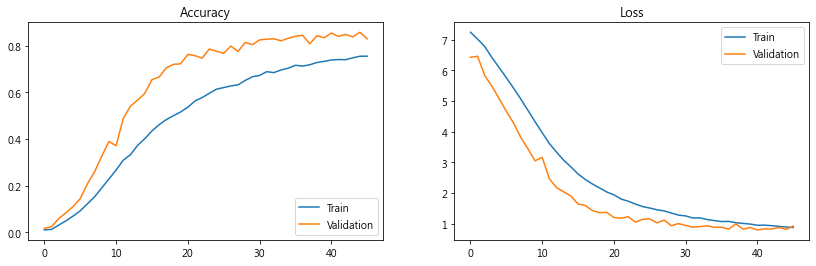

In [18]:
Train_Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.figure( figsize=(14,4) )
plt.subplot( 1,2,1 )
plt.plot( range( len(Train_Accuracy) ), Train_Accuracy, label='Train' ) 
plt.plot( range( len(Val_Accuracy) ), Val_Accuracy, label='Validation' ) 
plt.legend( loc='lower right' )
plt.title( 'Accuracy' )

plt.subplot( 1,2,2 )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train' )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Validation' )
plt.legend( loc='upper right' )
plt.title( 'Loss')

plt.show()

### 

In [25]:
os.chdir( TraningDataPath )
CNN.save( 'test.h5' )

In [5]:
Test_Data_Genetor = ImageDataGenerator( rescale=1./255 )
Test_Generator = Test_Data_Genetor.flow_from_directory( #TraningDataPath,
                                                        TestingDataPath,
                                                        target_size = Image_Size,
                                                        shuffle = False,
                                                        class_mode = 'categorical' )

Found 164 images belonging to 2 classes.


In [6]:
Test_Data_Genetor
data, label =Test_Generator[0]
data.shape

(32, 64, 64, 3)

batch 1: 
 shape of images: (32, 64, 64, 3) 
 shape of labels: (32, 4)


ValueError: num must be 1 <= num <= 10, not 11

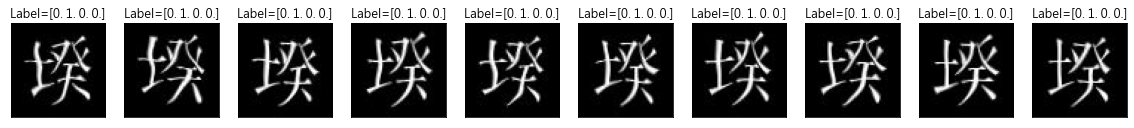

In [9]:
def Plot_Genetor( imgs, labels=[], grid=(1,10), size=(20,2) ):
    n = len( imgs )             
    plt.gcf().set_size_inches(size) 
    for i in range(n):           
        ax = plt.subplot( grid[0], grid[1], i+1 )   
        ax.imshow( imgs[i] )            
        if len(labels):
            ax.set_title( f'Label={labelsels[i]}' )   
        ax.set_xticks([]); ax.set_yticks([]) 
    plt.show()  
batch = 1
for data, label in Test_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Genetor( data, label )
    batch += 1
    if batch > 1: 
        break

In [17]:
CNN = load_model('CNN_model.h5') # Loading pretrained model
Predicts = CNN.predict( Test_Generator )

OSError: SavedModel file does not exist at: CNN_model.h5/{saved_model.pbtxt|saved_model.pb}

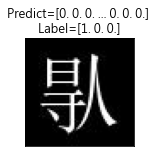

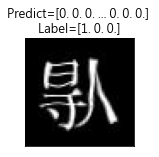

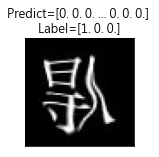

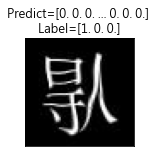

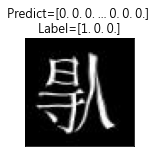

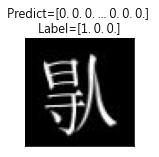

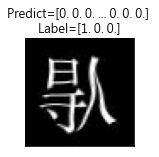

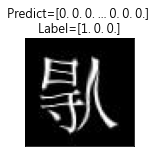

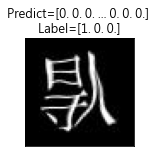

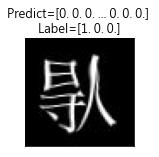

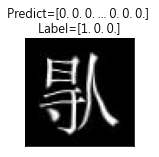

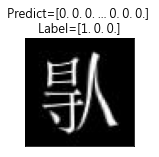

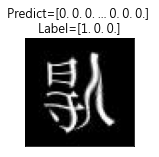

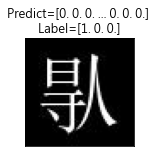

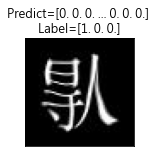

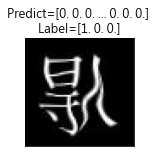

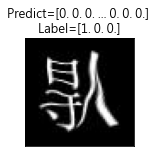

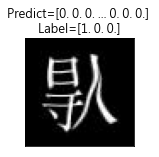

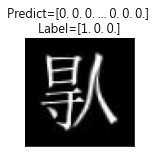

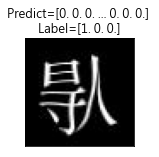

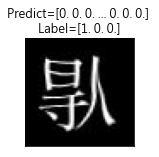

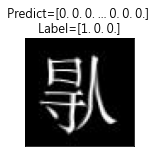

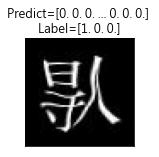

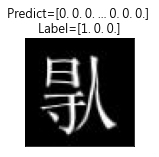

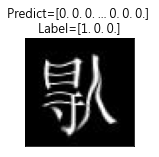

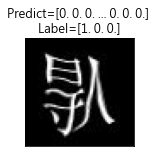

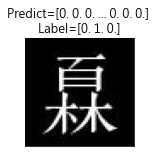

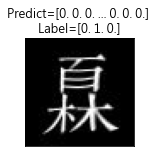

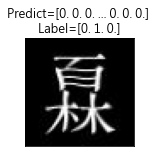

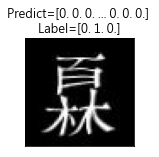

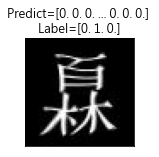

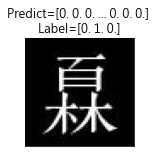

In [123]:
test_data, test_label = Test_Generator.next()

def Plot_Predict( img, labels=[], predicts=[], size=(20,2) ):             
    plt.gcf().set_size_inches(size)           
    ax = plt.subplot( )   
    ax.imshow( img )            
    ax.set_title( f'Predict={predicts.round(1)} \nLabel={labels}' )   
    ax.set_xticks([]); ax.set_yticks([]) 
    plt.show() 
    
for data, label, predict_label in zip(test_data,  test_label, Predicts):
    Plot_Predict( data, label, predict_label )

In [22]:
test_data, test_label = Test_Generator.next()
test_label

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [15]:
for i in range(int(Predicts.shape[0]/26)):
    
    print(list(Predicts.round(1)[i*26]).index(1) if 1 in list(Predicts.round(1)[i*26]) else -1)
    #thing_index = thing_list.index(elem) if elem in thing_list else -1


17
154
220
353
434
742


In [ ]:
for i in range(int(Predicts.shape[0]/26)):
    
    print((Predicts.round(1)[i*26,i]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [128]:
for i in range(int(Predicts.shape[0])):
    print(list(Predicts.round(1)[i]).index(1))

0
0
0
0
0


KeyboardInterrupt: 

In [108]:
list(Predicts.round(1)[13]).index(1)

742

In [67]:

17
154
220
434
742

130

In [ ]:
154
220
742

131739: 17
20 : 742
136093: 154
139685: 220
151443: 434
